## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## 1.Data Collection

In [2]:
df=pd.read_csv('admission.csv')

In [3]:
df.head()

,Hall ticket (10th class),10th GPA,Govt/Private School,Caste,Gender,Mandal,District,State,Chance of Admit
0,1720104115,10.0,Private,BC-B,Male,Kallur,Kurnool,Ap,0.83
1,1722136839,10.0,Govt school,BC-B,Male,Galiveedu,Kadapa,Ap,0.98
2,1718124014,9.7,Govt school,BC-B,Female,Madanapalli,Chittoor,Ap,0.93
3,1722136791,9.8,Govt school,SC,Male,Galiveedu,Kadapa,Ap,0.95
4,1722107642,9.8,Govt school,OC,Female,Vallur,Kadapa,Ap,0.90


## 2. Exploratory Data Analysys (EDA)

In [4]:
df.shape

(412, 9)

In [5]:
df.describe()

,10th GPA,Chance of Admit
count,412.000000,412.000000
mean,9.115777,0.672549
std,0.925454,0.327260
min,6.800000,0.090000
25%,8.400000,0.300000
50%,9.700000,0.870000
75%,9.800000,0.930000
max,10.000000,0.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hall ticket (10th class)  412 non-null    object 
 1   10th GPA                  412 non-null    float64
 2   Govt/Private School       412 non-null    object 
 3   Caste                     412 non-null    object 
 4   Gender                    412 non-null    object 
 5   Mandal                    412 non-null    object 
 6   District                  412 non-null    object 
 7   State                     412 non-null    object 
 8   Chance of Admit           412 non-null    float64
dtypes: float64(2), object(7)
memory usage: 29.1+ KB


In [7]:
df.columns

Index(['Hall ticket (10th class)', '10th GPA', 'Govt/Private School', 'Caste',
       'Gender', 'Mandal', 'District', 'State', 'Chance of Admit'],
      dtype='object')

In [8]:
df.isnull().sum()

Hall ticket (10th class)    0
10th GPA                    0
Govt/Private School         0
Caste                       0
Gender                      0
Mandal                      0
District                    0
State                       0
Chance of Admit             0
dtype: int64

## Analyzing the Data

In [9]:
points=df['10th GPA'].unique()
points_count=df['10th GPA'].value_counts().tolist()

<BarContainer object of 29 artists>

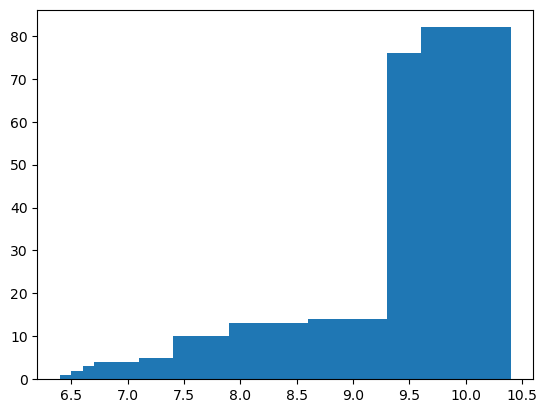

In [10]:
#plt.figure(figsize=(10, 5))
plt.bar(points, points_count)

In [11]:
df[df['10th GPA']<7]

,Hall ticket (10th class),10th GPA,Govt/Private School,Caste,Gender,Mandal,District,State,Chance of Admit
408,1720151166,6.9,Govt school,OC,Female,Duttalur,Nellore,Ap,0.10
409,1717142121,6.9,Govt school,BC-B,Female,Venkatagiri,Nellore,Ap,0.11
410,1718128082,6.9,Govt school,BC-B,Female,Yemmiganur,Kurnool,Ap,0.11
411,1718117056,6.8,Govt school,OC,Male,Kadapa,Kadapa,Ap,0.09


In [12]:
castes=df['Caste'].unique()
castes_count=df['Caste'].value_counts().to_list()

<BarContainer object of 7 artists>

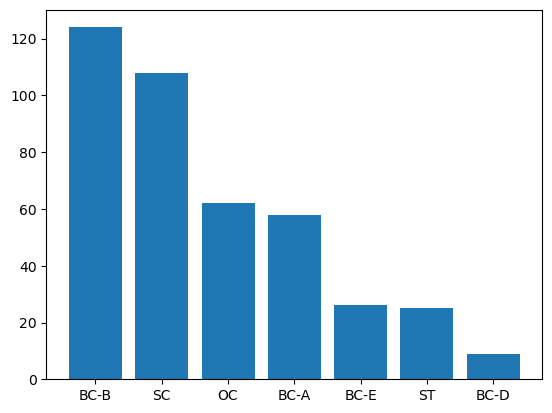

In [13]:
plt.bar(castes, castes_count)

In [14]:
gender=df['Gender'].unique()
gender_count=df['Gender'].value_counts().to_list()

<BarContainer object of 2 artists>

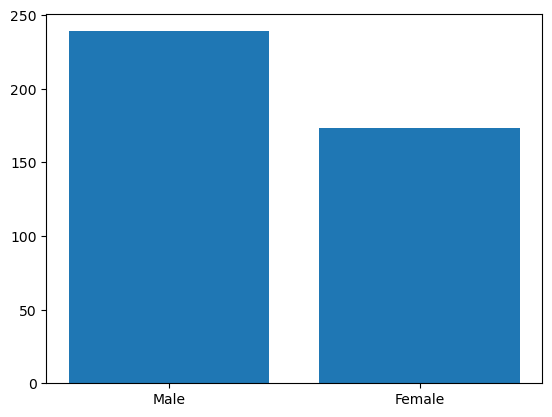

In [15]:
plt.bar(gender, gender_count)

In [16]:
school=df['Govt/Private School'].unique()
school_count=df['Govt/Private School'].value_counts().to_list()

In [17]:
df['Govt/Private School'].value_counts()

Govt school    360
Private         52
Name: Govt/Private School, dtype: int64

<BarContainer object of 2 artists>

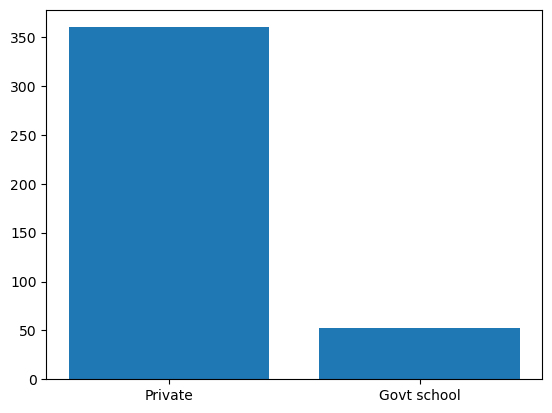

In [18]:
plt.bar(school, school_count)

In [19]:
l=[0, 7, 10, 1, 7, 4, 15, 6, 10]

In [20]:
sum(l)

60

## 3. Data Pre-Processing

In [21]:
df['Govt/Private School']=df['Govt/Private School'].replace(['Govt school', 'Private'], [0.4, 0])

In [22]:
df['Caste']=df['Caste'].replace(['OC','BC-A','BC-B','BC-C', 'BC-D', 'BC-E','SC','ST', 'EWS'],
                                [40, 47, 50, 41, 47, 44, 55, 46, 50])

In [23]:
df['Gender']=df['Gender'].replace(['Male', 'Female'], [66, 100])

In [24]:
total=10+0.4+55+100

In [25]:
df.head()

,Hall ticket (10th class),10th GPA,Govt/Private School,Caste,Gender,Mandal,District,State,Chance of Admit
0,1720104115,10.0,0.0,50,66,Kallur,Kurnool,Ap,0.83
1,1722136839,10.0,0.4,50,66,Galiveedu,Kadapa,Ap,0.98
2,1718124014,9.7,0.4,50,100,Madanapalli,Chittoor,Ap,0.93
3,1722136791,9.8,0.4,55,66,Galiveedu,Kadapa,Ap,0.95
4,1722107642,9.8,0.4,40,100,Vallur,Kadapa,Ap,0.90


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hall ticket (10th class)  412 non-null    object 
 1   10th GPA                  412 non-null    float64
 2   Govt/Private School       412 non-null    float64
 3   Caste                     412 non-null    int64  
 4   Gender                    412 non-null    int64  
 5   Mandal                    412 non-null    object 
 6   District                  412 non-null    object 
 7   State                     412 non-null    object 
 8   Chance of Admit           412 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 29.1+ KB


## Calculate Performance Score

In [27]:
df["Performance Score"] = df["Govt/Private School"] + df["Caste"] + df["Gender"] + df["10th GPA"]

In [28]:
df['Percent']=df['Performance Score']/total

In [29]:
df.head()

,Hall ticket (10th class),10th GPA,Govt/Private School,Caste,Gender,Mandal,District,State,Chance of Admit,Performance Score,Percent
0,1720104115,10.0,0.0,50,66,Kallur,Kurnool,Ap,0.83,126.0,0.761790
1,1722136839,10.0,0.4,50,66,Galiveedu,Kadapa,Ap,0.98,126.4,0.764208
2,1718124014,9.7,0.4,50,100,Madanapalli,Chittoor,Ap,0.93,160.1,0.967956
3,1722136791,9.8,0.4,55,66,Galiveedu,Kadapa,Ap,0.95,131.2,0.793229
4,1722107642,9.8,0.4,40,100,Vallur,Kadapa,Ap,0.90,150.2,0.908102


In [30]:
df["Performance Score"].value_counts()

160.4    16
150.2    14
160.1    13
160.2    13
150.4    11
         ..
125.1     1
114.7     1
164.2     1
125.2     1
113.2     1
Name: Performance Score, Length: 168, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hall ticket (10th class)  412 non-null    object 
 1   10th GPA                  412 non-null    float64
 2   Govt/Private School       412 non-null    float64
 3   Caste                     412 non-null    int64  
 4   Gender                    412 non-null    int64  
 5   Mandal                    412 non-null    object 
 6   District                  412 non-null    object 
 7   State                     412 non-null    object 
 8   Chance of Admit           412 non-null    float64
 9   Performance Score         412 non-null    float64
 10  Percent                   412 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 35.5+ KB


In [32]:
df.isnull().sum()

Hall ticket (10th class)    0
10th GPA                    0
Govt/Private School         0
Caste                       0
Gender                      0
Mandal                      0
District                    0
State                       0
Chance of Admit             0
Performance Score           0
Percent                     0
dtype: int64

## Finding Relationship between Independent and Dependent Variables

In [33]:
df.corr()

,10th GPA,Govt/Private School,Caste,Gender,Chance of Admit,Performance Score,Percent
10th GPA,1.000000,-0.000630,0.003446,0.007073,0.971466,0.062371,0.062371
Govt/Private School,-0.000630,1.000000,0.009411,0.135724,0.097548,0.144545,0.144545
Caste,0.003446,0.009411,1.000000,-0.117507,0.040037,0.182736,0.182736
Gender,0.007073,0.135724,-0.117507,1.000000,0.010696,0.953355,0.953355
Chance of Admit,0.971466,0.097548,0.040037,0.010696,1.000000,0.076083,0.076083
Performance Score,0.062371,0.144545,0.182736,0.953355,0.076083,1.000000,1.000000
Percent,0.062371,0.144545,0.182736,0.953355,0.076083,1.000000,1.000000


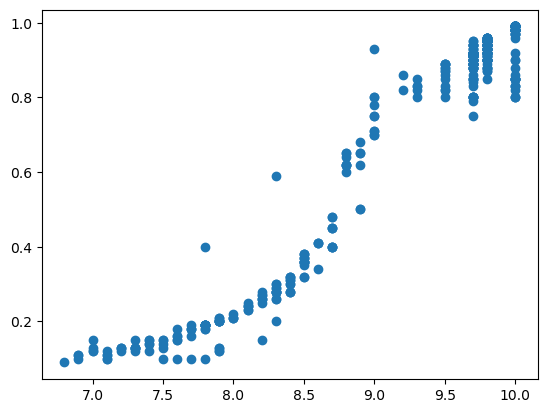

In [34]:
plt.scatter(df['10th GPA'], df['Chance of Admit'])

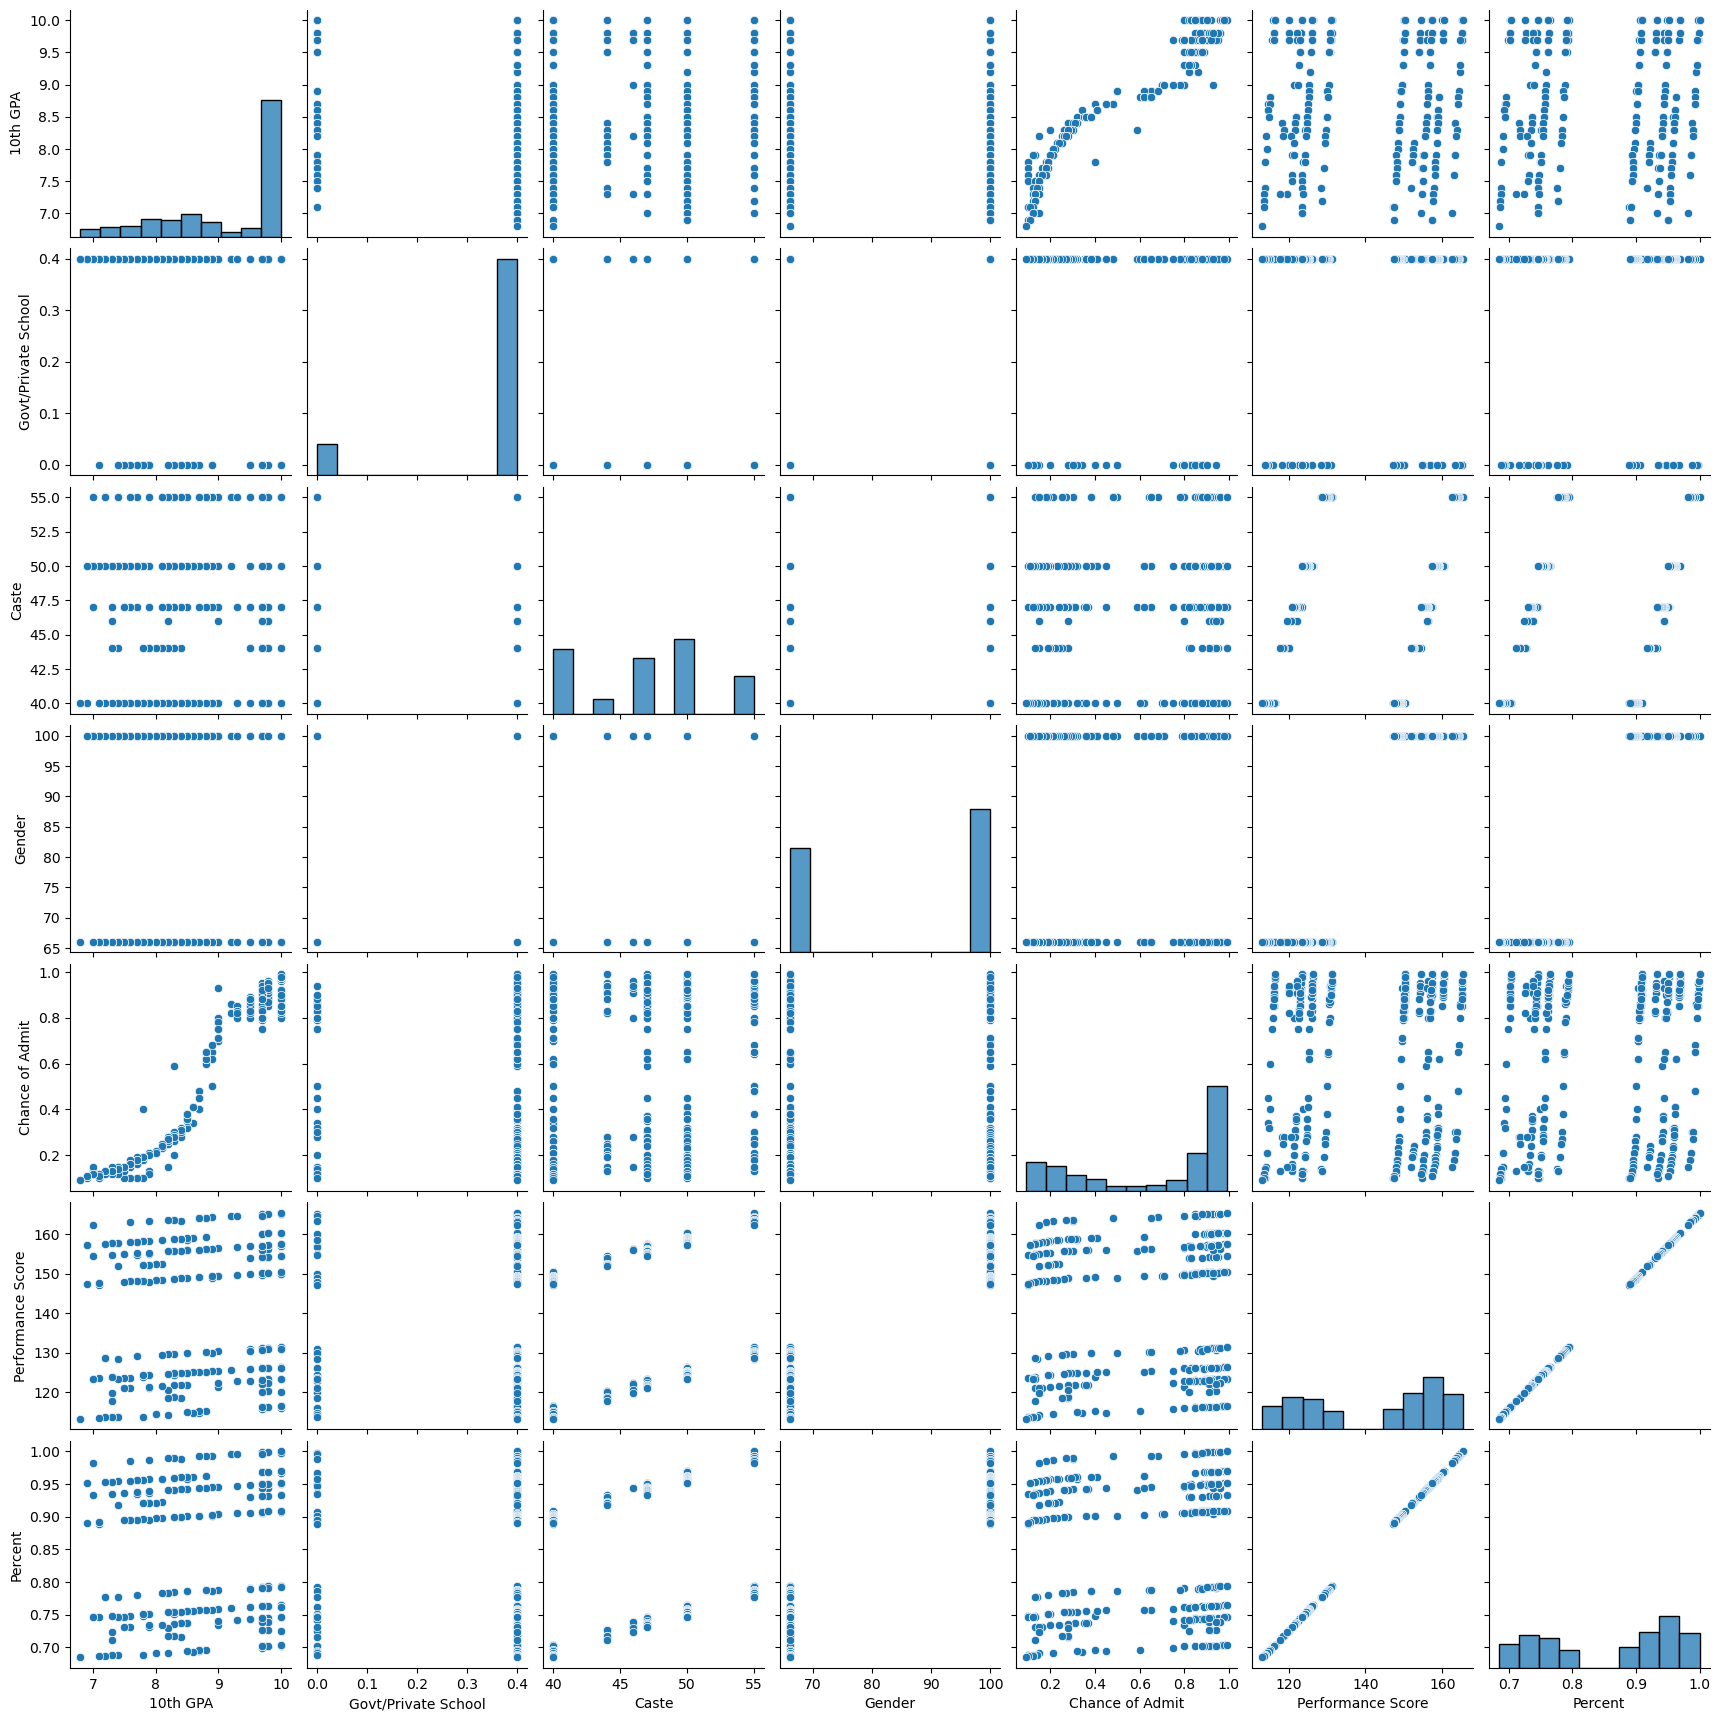

In [61]:
sns.pairplot(df)

## 4. Data Selection

In [62]:
X=df.loc[:,["10th GPA","Govt/Private School","Caste","Gender"]]
Y=df["Percent"]

In [63]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=0, test_size=0.2)

## 5. Model Building - Training

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
LR=LinearRegression()

In [66]:
LR.fit(x_train, y_train)

LinearRegression()

In [67]:
#import pickle

In [68]:
#f=open("model.pkl", 'wb')

In [69]:
#pickle.dump(LR, f)

In [70]:
#f=open('model.pkl', 'rb')
#model=pickle.load(f)
#f.close()

In [71]:
pred=LR.predict(x_test)

In [72]:
data=pd.DataFrame()
data['Original']=y_test
data['Predict']=pred

In [73]:
data

,Original,Predict
376,0.955260,0.955260
170,0.762999,0.762999
230,0.908102,0.908102
330,0.940750,0.940750
336,0.897823,0.897823
...,...,...
307,0.899637,0.899637
100,0.907497,0.907497
7,0.744861,0.744861
22,0.701935,0.701935


## 6. Testing

In [74]:
y_pred=LR.predict(x_test)

In [75]:
data=pd.DataFrame()
data['Original']=y_test
data['Predict']=y_pred

In [76]:
data

,Original,Predict
376,0.955260,0.955260
170,0.762999,0.762999
230,0.908102,0.908102
330,0.940750,0.940750
336,0.897823,0.897823
...,...,...
307,0.899637,0.899637
100,0.907497,0.907497
7,0.744861,0.744861
22,0.701935,0.701935


## 7. Validation

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
r2_score(y_test, y_pred)

1.0

In [79]:
mean_squared_error(y_test, y_pred)

7.870788399230727e-33

In [80]:
mean_absolute_error(y_test, y_pred)

6.821852319985901e-17

In [81]:
X=df.loc[:,["10th GPA","Govt/Private School","Caste","Gender"]]
Y=df["Chance of Admit"]

In [86]:
LR.predict([[10, 0.4, 55, 66]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.79443773])